# Laboratorio 4 - Inteligencia Artificial

## Autores:

- Nelson García
- Andy Fuentes
- Davis Roldan
- Ricardo Chuy
- Diederich Solís

## Task 1 - Preguntas teóricas

## Task 2 - Ejercicios Prácticos

### Task 2.1 - K-Means y Segmentación de Clientes de Banco

### Ejercicio realizado con librerias

Ahora se realizará el mismo ejercicio de segmentacion de clientes pero utilizando las librerias apropiadas para usar el algoritmo de K-Medias. Con esto se busca realizar grupos con el set de datos de clientes de banco. Se hará selección principalmente de variables numéricas y de ser necesario se transformará alguna variable categórica a numérica si es que se considera relevante para la creación de clusters. 

Además de esto es importante mencionar que el set de datos no se encuentra balanceado, pero esto no representa un problema realmente. Ya que el clustering es un algoritmo de clasificación y aprendizaje no supervisado, no se tiene una columna objetivo. Por lo que no es neceario el balanceo de datos en este caso.

Para determinar el éxito del agrupamiento se usará el método de la silueta. Un recurso particularmente útil para evaluar el desepeño de modelos de agrupamiento como K-means, cluster jerárquico, entre otros.


In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [50]:
df = pd.read_csv("banK_transactions.csv")

# TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
# T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25

numeric_variables = df[["CustAccountBalance","TransactionAmount (INR)"]]

print(numeric_variables.head())

# Nan
print(numeric_variables.isnull().sum())

imputer = SimpleImputer(strategy='mean')
scaled_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_variables), columns=numeric_variables.columns)

# Check if NaN values are imputed
print(scaled_df_imputed.isnull().sum())


   CustAccountBalance  TransactionAmount (INR)
0            17819.05                     25.0
1             2270.69                  27999.0
2            17874.44                    459.0
3           866503.21                   2060.0
4             6714.43                   1762.5
CustAccountBalance         2369
TransactionAmount (INR)       0
dtype: int64
CustAccountBalance         0
TransactionAmount (INR)    0
dtype: int64


In [51]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_df_imputed)

scaled_df = pd.DataFrame(scaled_features, columns=["CustAccountBalance","TransactionAmount (INR)"])
print(scaled_df.head())


   CustAccountBalance  TransactionAmount (INR)
0           -0.115412                -0.235650
1           -0.133801                 4.019119
2           -0.115347                -0.169639
3            0.888320                 0.073868
4           -0.128546                 0.028619


Para verificar la cantidad de clusteres ideal es necesario hacer un gráfico de codo.

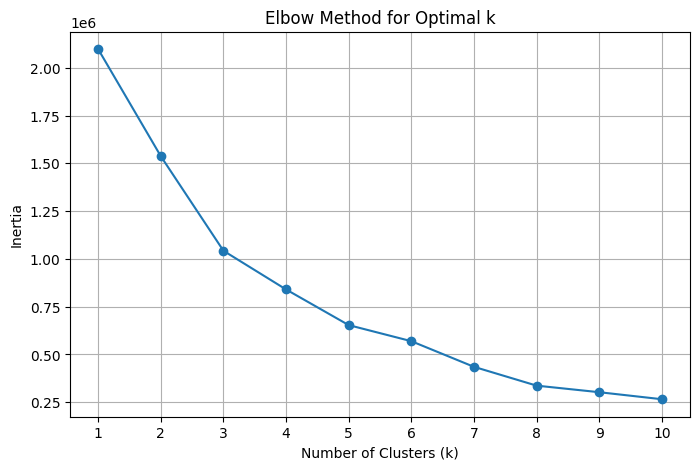

In [52]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid()
plt.show()

Con este gráfico se puede ver que el número óptimo de clusters probablemente sea 3 o 4.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

# Returning cluste
df['Cluster'] = kmeans.labels_

print(df[['CustAccountBalance', 'TransactionAmount (INR)', 'Cluster']].head())

   CustAccountBalance  TransactionAmount (INR)  Cluster
0            17819.05                     25.0        0
1             2270.69                  27999.0        0
2            17874.44                    459.0        0
3           866503.21                   2060.0        0
4             6714.43                   1762.5        0


In [ ]:
silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

### Task 2.2 - Mixture Modelos y Segmentación de Clientes de Banco